## 1. Data Loading

In [15]:
# Importing necessary libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

# Function to load datasets
def load_data():
    # Load the training, test, and solution data
    train_data = pd.read_csv(r"Genre Classification Dataset\train_data.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
    test_data = pd.read_csv(r"Genre Classification Dataset\test_data.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
    test_solution_data = pd.read_csv(r"Genre Classification Dataset\test_data_solution.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])

    print(f"Train data shape: {train_data.shape}")
    print(f"Test data shape: {test_data.shape}")
    print(f"Test solution data shape: {test_solution_data.shape}")

    return train_data, test_data, test_solution_data

# Load the data
train_data, test_data, test_solution_data = load_data()


C:\Users\Rasagna\AppData\Local\Temp\ipykernel_12552\3308730009.py:17: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv(r"Genre Classification Dataset\train_data.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
C:\Users\Rasagna\AppData\Local\Temp\ipykernel_12552\3308730009.py:18: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data = pd.read_csv(r"Genre Classification Dataset\test_data.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
C:\Users\Rasagna\AppData\Local\Temp\ipykernel_12552\3308730009.py:19: ParserWarning: Falling back to the 'python' engi

Train data shape: (54214, 4)
Test data shape: (54200, 4)
Test solution data shape: (54200, 4)


## 2. Data Preprocessing

In [16]:
# Function to preprocess the data (handle missing descriptions)
def preprocess_data(train_data, test_data):
    train_data['DESCRIPTION'].fillna("", inplace=True)
    test_data['DESCRIPTION'].fillna("", inplace=True)
    return train_data, test_data

# Preprocess the datasets
train_data, test_data = preprocess_data(train_data, test_data)


C:\Users\Rasagna\AppData\Local\Temp\ipykernel_12552\423831489.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['DESCRIPTION'].fillna("", inplace=True)
C:\Users\Rasagna\AppData\Local\Temp\ipykernel_12552\423831489.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

## 3. Feature Engineering (Text Vectorization)

In [17]:
# Function to extract features using TF-IDF Vectorization
def extract_features(train_data, test_data):
    t_v = TfidfVectorizer(stop_words='english', max_features=100000)
    X_train = t_v.fit_transform(train_data['DESCRIPTION'])
    X_test = t_v.transform(test_data['DESCRIPTION'])
    return t_v, X_train, X_test

# Extract features from the data
t_v, X_train, X_test = extract_features(train_data, test_data)


## 4. Label Encoding (Target Variable Encoding)

In [18]:
# Function to encode target labels (Genres)
def encode_labels(train_data, test_solution_data):
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(train_data['GENRE'])
    y_test = label_encoder.transform(test_solution_data['GENRE'])
    return label_encoder, y_train, y_test

# Encode the genre labels
label_encoder, y_train, y_test = encode_labels(train_data, test_solution_data)


## 5. Train-Test Split (Splitting into Training and Validation Sets)

In [19]:
# Function to split data into training and validation sets
def split_data(X_train, y_train):
    X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    return X_train_sub, X_val, y_train_sub, y_val

# Split the training data into training and validation subsets
X_train_sub, X_val, y_train_sub, y_val = split_data(X_train, y_train)


## 6. Model Training

### a) LinearSVC Model :

In [20]:
# Function to train a LinearSVC model
def train_linear_svc(X_train_sub, y_train_sub):
    clf = LinearSVC()
    clf.fit(X_train_sub, y_train_sub)
    return clf

# Train the LinearSVC model
clf = train_linear_svc(X_train_sub, y_train_sub)


### b) Multinomial Naive Bayes Model :

In [21]:
# Function to train a Multinomial Naive Bayes model
def train_mnb(X_train, y_train):
    mnb_classifier = MultinomialNB()
    mnb_classifier.fit(X_train, y_train)
    return mnb_classifier

# Train the Multinomial Naive Bayes model (Optional)
mnb_classifier = train_mnb(X_train, y_train)


### c) Logistic Regression Model :

In [22]:
# Function to train a Logistic Regression model
def train_logistic_regression(X_train, y_train):
    lr_classifier = LogisticRegression(max_iter=500)
    lr_classifier.fit(X_train, y_train)
    return lr_classifier

# Train the Logistic Regression model (Optional)
lr_classifier = train_logistic_regression(X_train, y_train)


## 7. Model Evaluation

### a) Validation Evaluation :

In [23]:
# Function to evaluate the model on the validation set
def evaluate_model(clf, X_val, y_val):
    y_val_pred = clf.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    report = classification_report(y_val, y_val_pred)
    print("Validation Accuracy:", accuracy)
    print("Validation Classification Report:\n", report)

# Evaluate the trained LinearSVC model
evaluate_model(clf, X_val, y_val)


Validation Accuracy: 0.5858157336530481
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.32      0.38       263
           1       0.75      0.43      0.55       112
           2       0.46      0.21      0.29       139
           3       0.44      0.14      0.22       104
           4       0.00      0.00      0.00        61
           5       0.53      0.60      0.56      1443
           6       0.35      0.06      0.10       107
           7       0.69      0.81      0.75      2659
           8       0.56      0.73      0.63      2697
           9       0.36      0.17      0.23       150
          10       0.25      0.05      0.09        74
          11       0.81      0.62      0.70        40
          12       0.00      0.00      0.00        45
          13       0.66      0.67      0.66       431
          14       0.62      0.54      0.58       144
          15       0.25      0.04      0.07        50
      

### b) Test Evaluation :

In [24]:
# Function to evaluate the model on the test set
def evaluate_test_model(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print("Test Accuracy:", accuracy)
    print("Test Classification Report:\n", report)

# Evaluate the trained LinearSVC model on the test set
evaluate_test_model(clf, X_test, y_test)


Test Accuracy: 0.09357933579335793
Test Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1314
           1       0.00      0.00      0.00       590
           2       0.00      0.00      0.00       775
           3       0.00      0.00      0.00       498
           4       0.00      0.00      0.00       264
           5       0.00      0.00      0.00      7446
           6       0.00      0.00      0.00       505
           7       0.00      0.00      0.00     13096
           8       0.00      0.00      0.00     13612
           9       0.00      0.00      0.00       783
          10       0.00      0.00      0.00       322
          11       0.00      0.00      0.00       193
          12       0.00      0.00      0.00       243
          13       0.00      0.00      0.00      2204
          14       0.00      0.00      0.00       731
          15       0.00      0.00      0.00       276
          16     

C:\Users\Rasagna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Rasagna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Rasagna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classi

## 8. Prediction for New Data

In [25]:
# Function to predict the genre of a movie given its description
def predict_movie(description, t_v, label_encoder, clf):
    t_v1 = t_v.transform([description])
    pred_label = clf.predict(t_v1)
    return label_encoder.inverse_transform(pred_label)[0]

# Predict movie genre for new descriptions
sample_descr_for_movie = "A movie where police catches the criminal and shoots him"
print(f"Predicted Genre: {predict_movie(sample_descr_for_movie, t_v, label_encoder, clf)}")

sample_descr_for_movie1 = "A movie where a person catches a girl to marry him but the girl refuses him."
print(f"Predicted Genre: {predict_movie(sample_descr_for_movie1, t_v, label_encoder, clf)}")


Predicted Genre:  drama 
Predicted Genre:  drama 


## 9. Data Visualization

### a) Genre Distribution Plot :

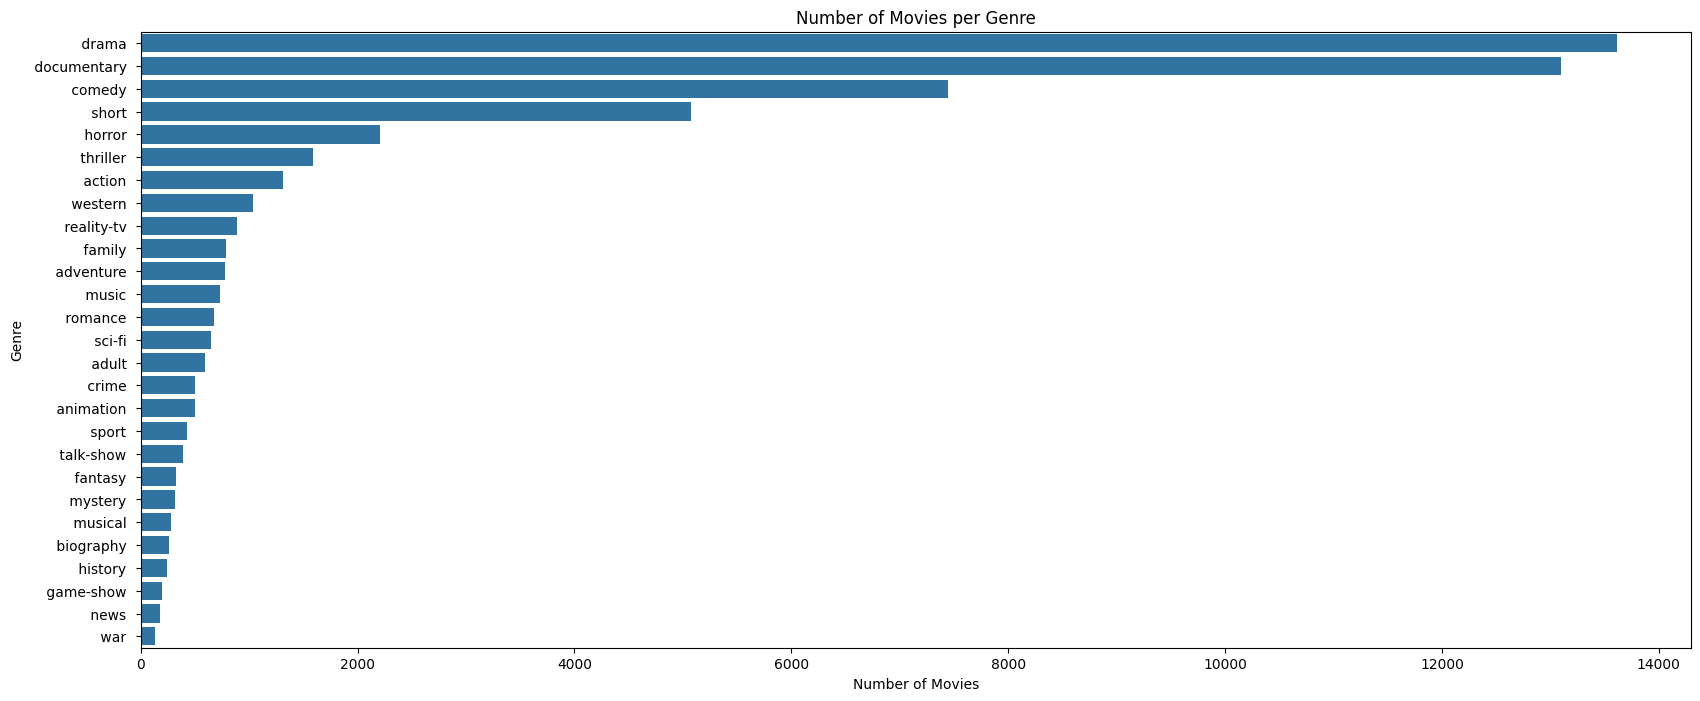

In [26]:
# Function to plot genre distribution in the training data
def plot_genre_distribution(data):
    plt.figure(figsize=(20, 8))
    sns.countplot(y=data['GENRE'], order=data['GENRE'].value_counts().index)
    plt.title('Number of Movies per Genre')
    plt.xlabel('Number of Movies')
    plt.ylabel('Genre')
    plt.show()

# Plot genre distribution
plot_genre_distribution(train_data)


### b) Description Length by Genre :

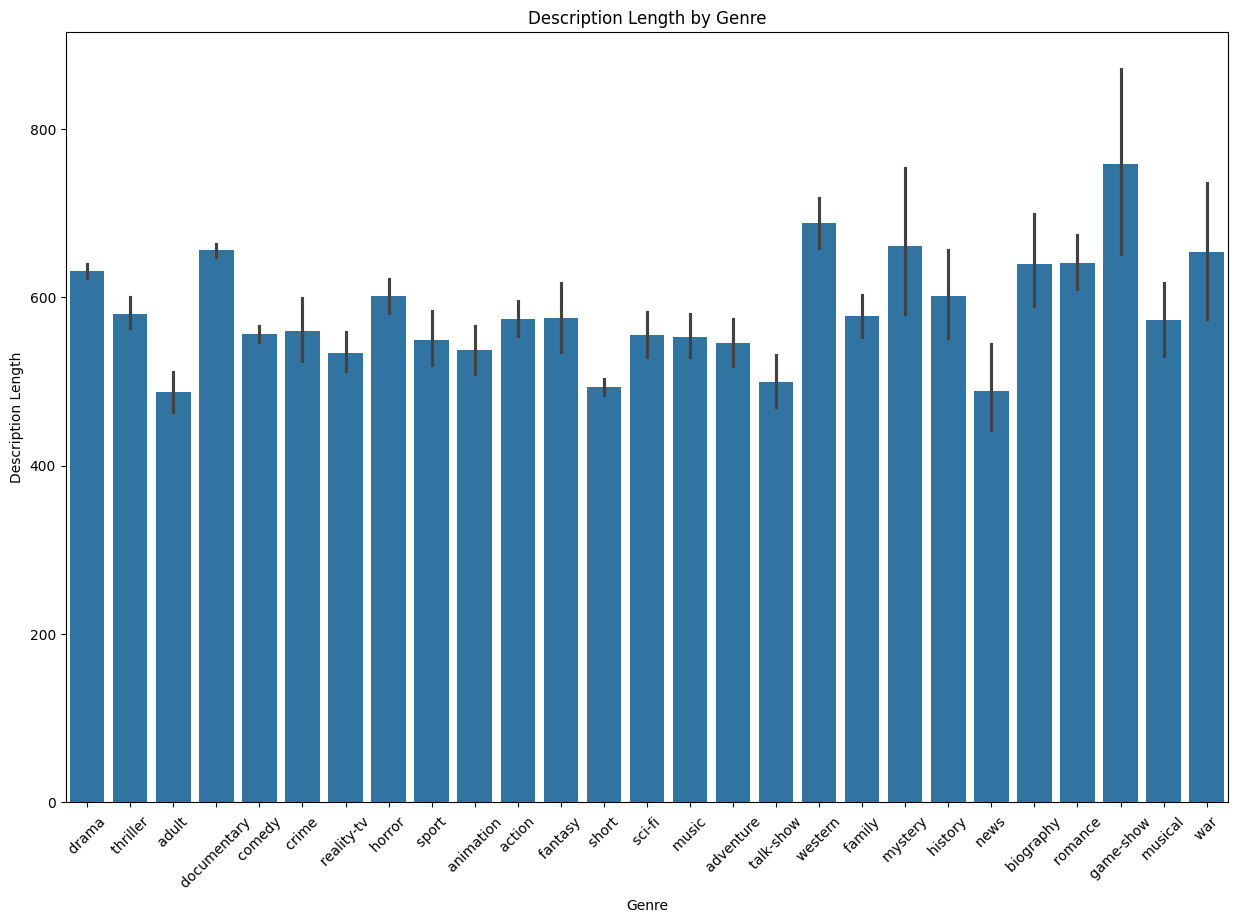

In [27]:
# Function to plot description length by genre
def plot_description_length_by_genre(data):
    data['DESCRIPTION_length'] = data['DESCRIPTION'].apply(len)
    plt.figure(figsize=(15, 10))
    sns.barplot(x='GENRE', y='DESCRIPTION_length', data=data)
    plt.title('Description Length by Genre')
    plt.xticks(rotation=45)
    plt.xlabel('Genre')
    plt.ylabel('Description Length')
    plt.show()

# Plot description length by genre
plot_description_length_by_genre(train_data)


### c) Top 10 Most Frequent Genres :

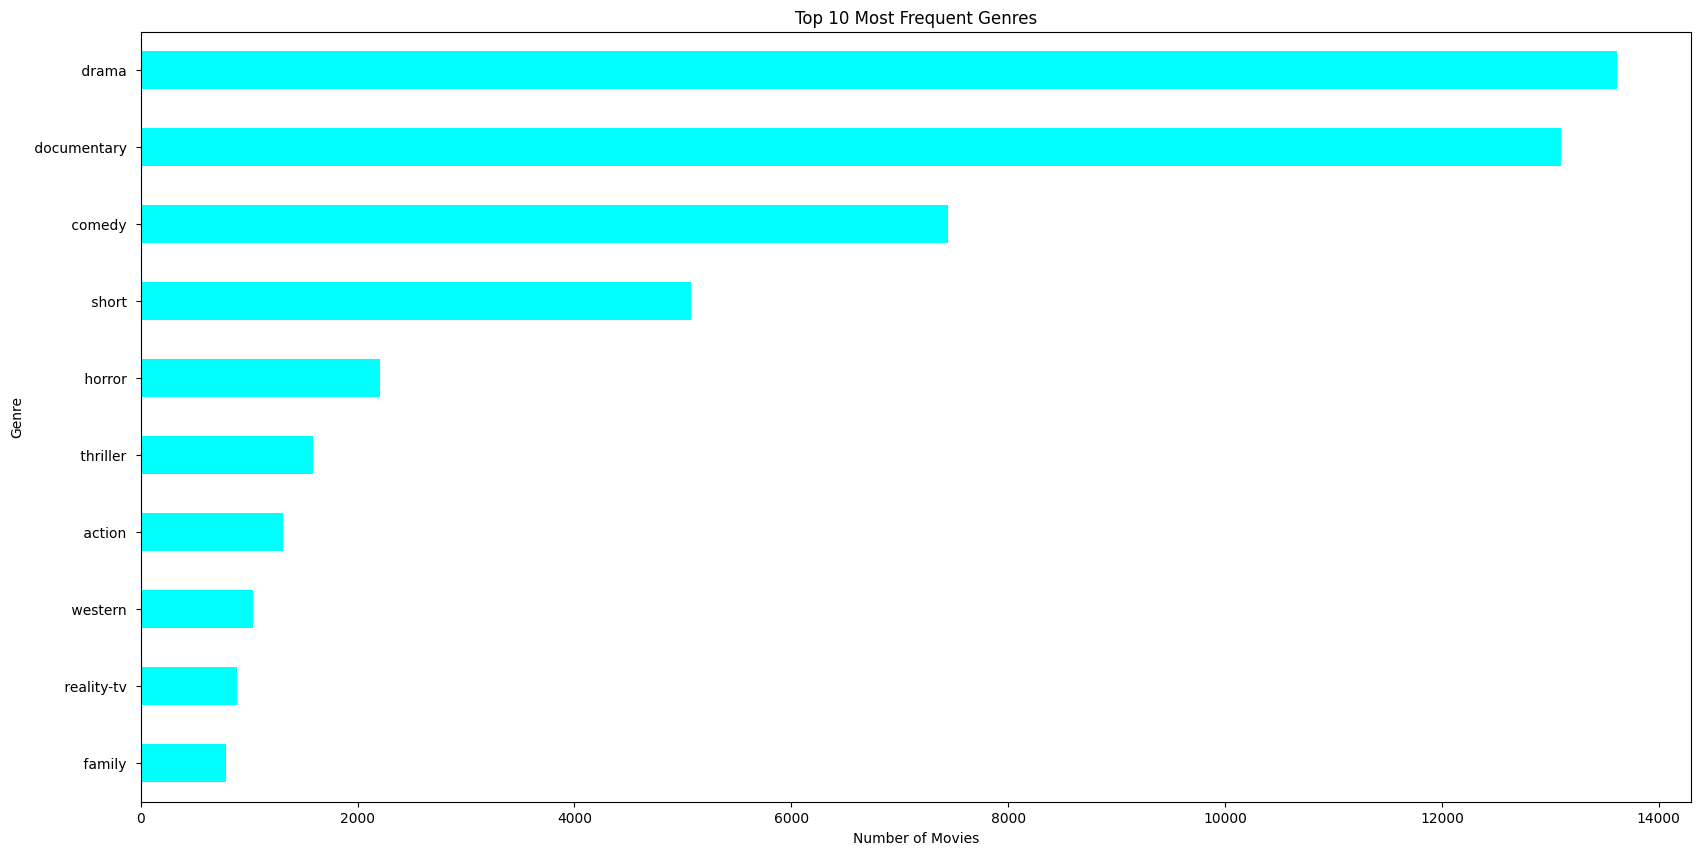

In [28]:
# Function to plot the top 10 most frequent genres
def plot_top_genres(data):
    top_genres = data['GENRE'].value_counts().head(10)
    plt.figure(figsize=(20, 10))
    top_genres.plot(kind='barh', color='cyan')
    plt.title('Top 10 Most Frequent Genres')
    plt.xlabel('Number of Movies')
    plt.ylabel('Genre')
    plt.gca().invert_yaxis()  # Invert y-axis to have the genre with the most movies at the top
    plt.show()

# Plot top genres
plot_top_genres(train_data)
